# AN2VEC colors asymmetric results

In [1]:
import itertools

import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
all_results = {}
for nnodes in [1000]:
    for sharedl1 in [True, False]:
        for decadjdeep in [True, False]:
            df = pd.read_csv('../../data/behaviour/colors/nnodes={nnodes}-'
                             'sharedl1={sharedl1}-decadjdeep={decadjdeep}-'
                             'model=ov-correlation=0:0.1:1-spill=-9:9-dimxi=10:2:20-nsamples=20.csv.gz'
                             .format(nnodes=nnodes, sharedl1=str(sharedl1).lower(),
                                     decadjdeep=str(decadjdeep).lower()),
                             compression='gzip')
            all_results[(nnodes, sharedl1, decadjdeep)] = df

In [3]:
results = all_results[(1000, False, True)]

In [4]:
results['adj+feat'] = results['adj'] + results['feat']

best_total_wide = results\
    .groupby(['nnodes', 'sharedl1', 'decadjdeep', 'correlation', 'spill', 'dimξ', 'sample'])\
    .apply(lambda x: x.loc[x['total loss'].idxmin()])\
    .reset_index(drop=True)
best_total = pd.melt(best_total_wide,
                     id_vars=['nnodes', 'sharedl1', 'decadjdeep', 'correlation',
                              'spill', 'dimξ', 'sample', 'epoch'],
                     var_name='loss', value_name='best total')

best_total_relspill = best_total.pivot_table(columns='spill',
                                             index=['nnodes', 'sharedl1', 'decadjdeep', 'correlation',
                                                    'dimξ', 'sample', 'loss'],
                                             values='best total')
best_total_relspill = best_total_relspill.apply(lambda x: x / best_total_relspill[0])
best_total_relspill = best_total_relspill.stack().reset_index().rename(columns={0: 'best total'})

### columns = correlation, hue = overlap

Absolute

/home/slerique/anaconda3/envs/base36-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


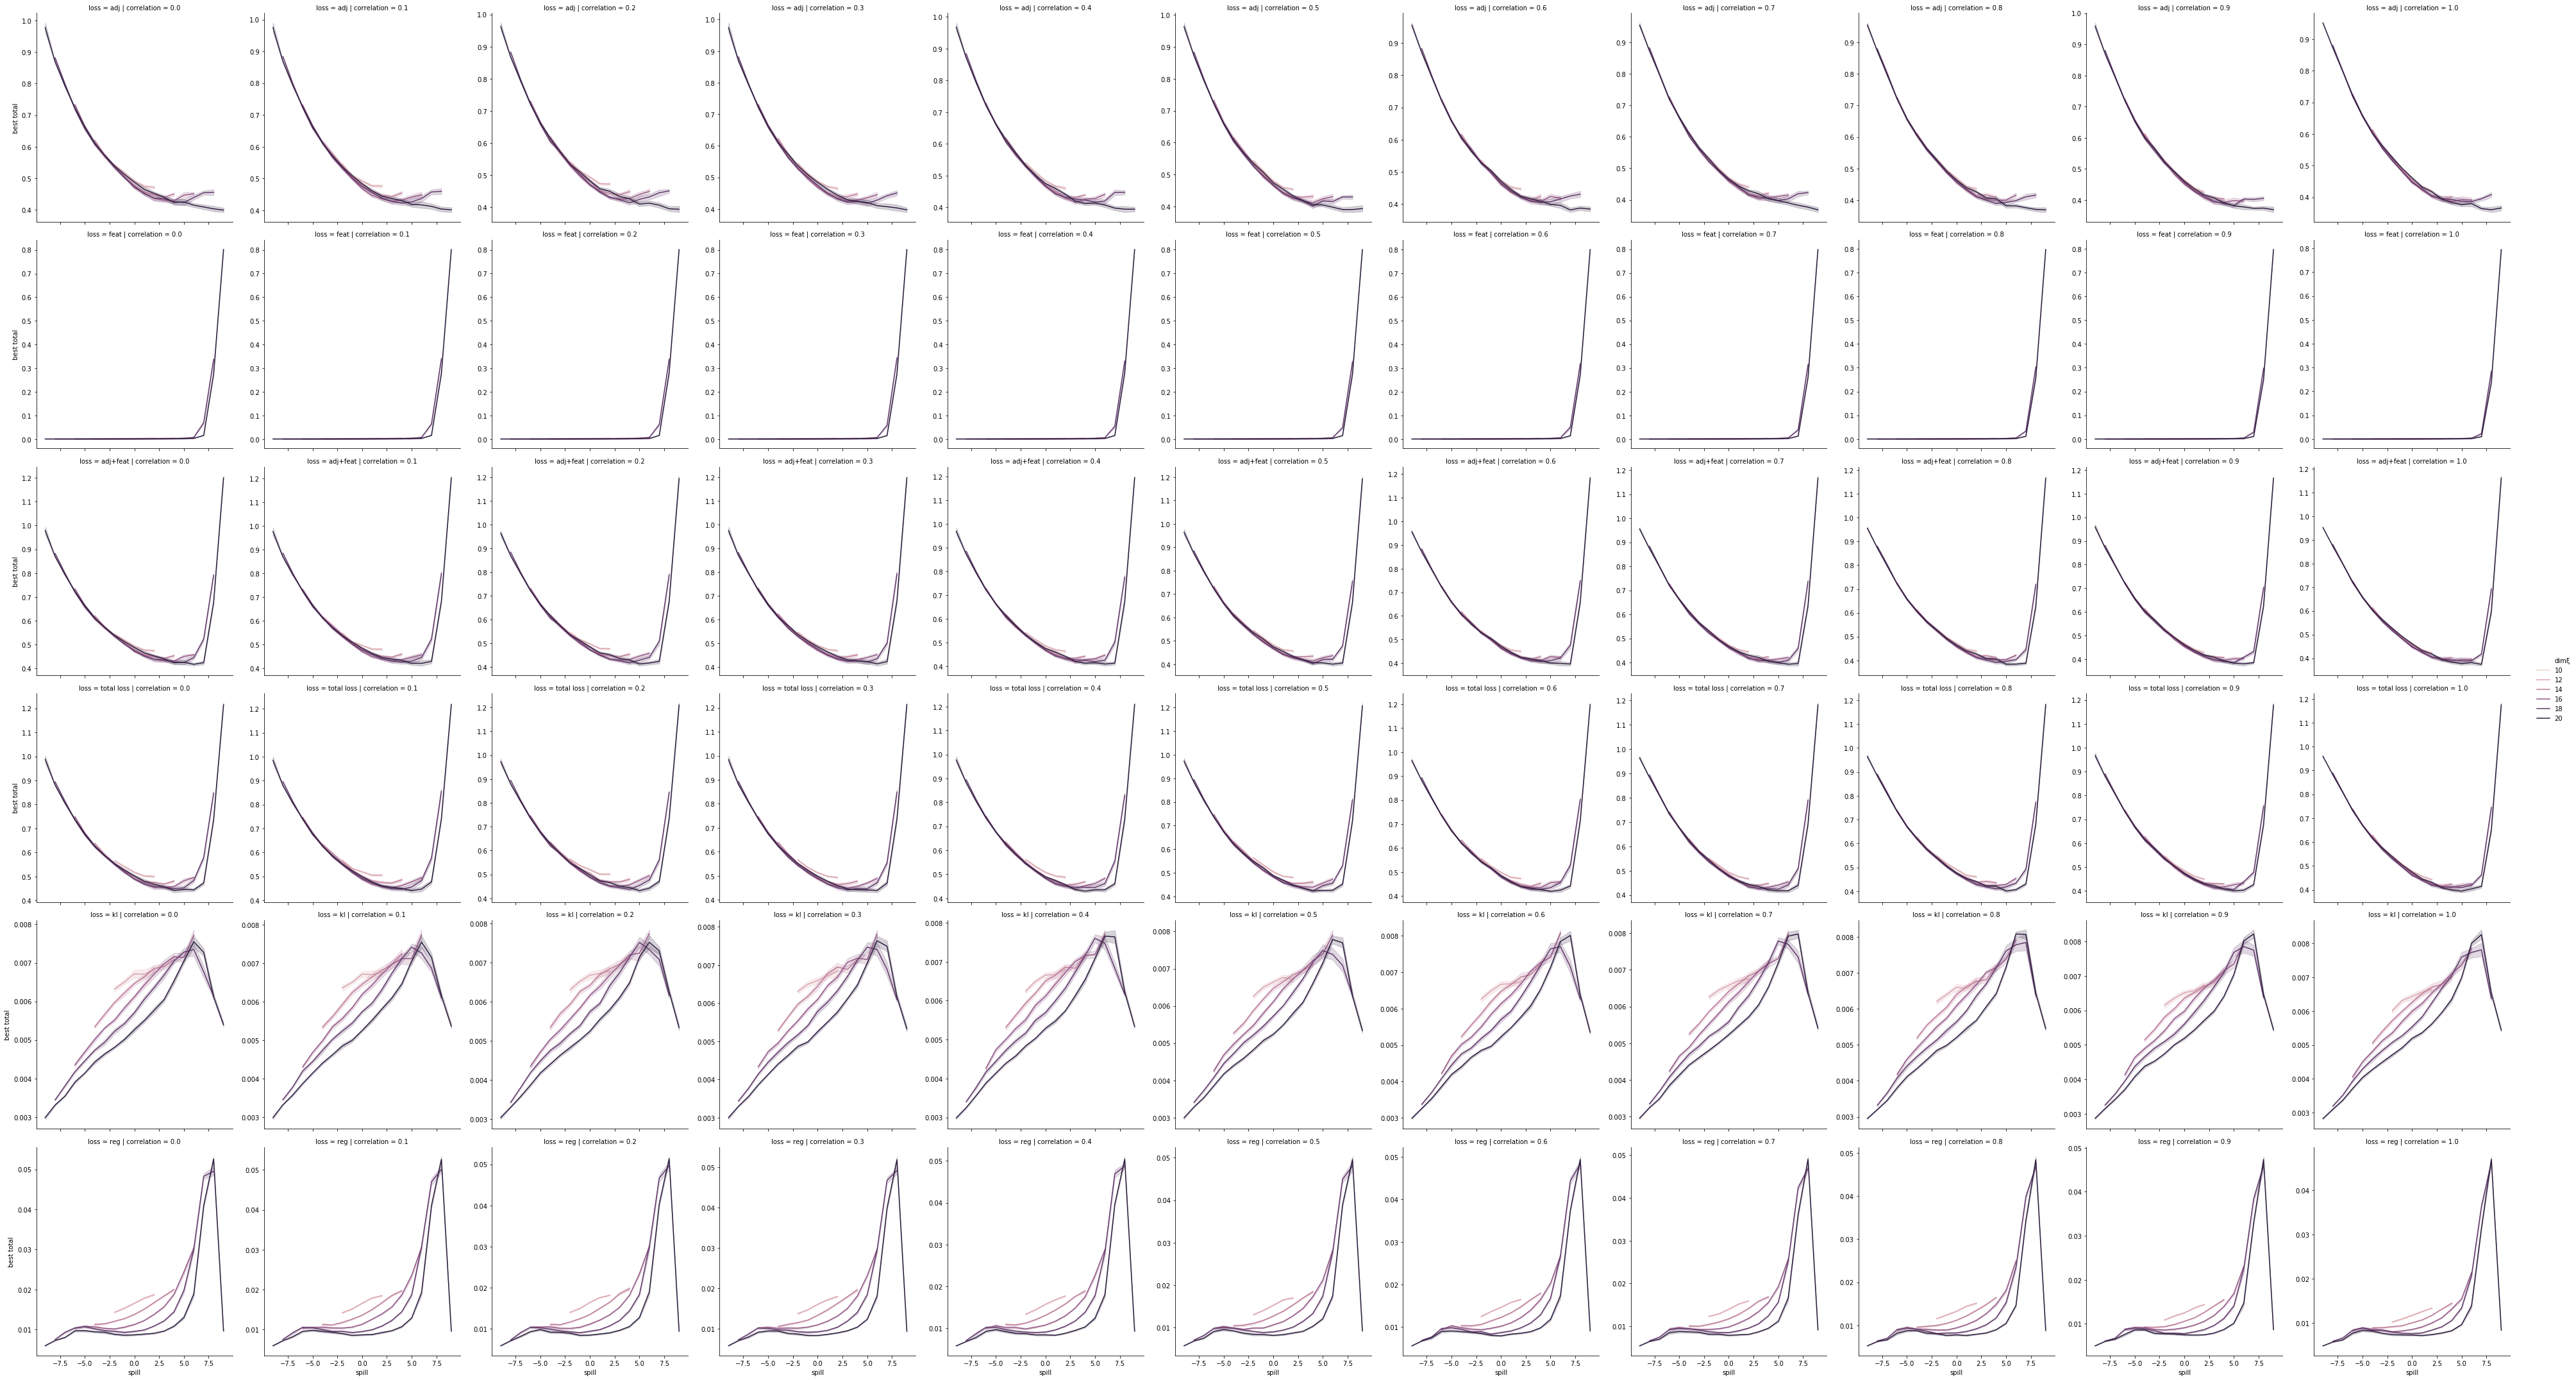

In [5]:
facet_grid = sb.relplot(x='spill', y='best total',
                        hue='dimξ', col='correlation',
                        row='loss', row_order=['adj', 'feat', 'adj+feat', 'total loss', 'kl', 'reg'],
                        data=best_total,
                        kind='line', legend='full', facet_kws={'sharey': False})

#facet_grid.set(yscale='log')

#for ax in facet_grid.axes[1]:
#    ax.set_ylim(0, 150)
#for ax in facet_grid.axes[2:4].flat:
#    ax.set_ylim(700, 900)
#
#figure_file = FIGURE_PATH.format(n_nodes=N_NODES, n_clusters=N_CLUSTERS,
#                                 n_alphas=N_ALPHAS, n_models=N_MODEL_SAMPLES, n_clusterings=N_CLUSTERINGS,
#                                 data_name='absolute_vs_spillv2adj-hue=ref_ov')
#facet_grid.fig.savefig(figure_file, bbox_inches='tight')

Relative

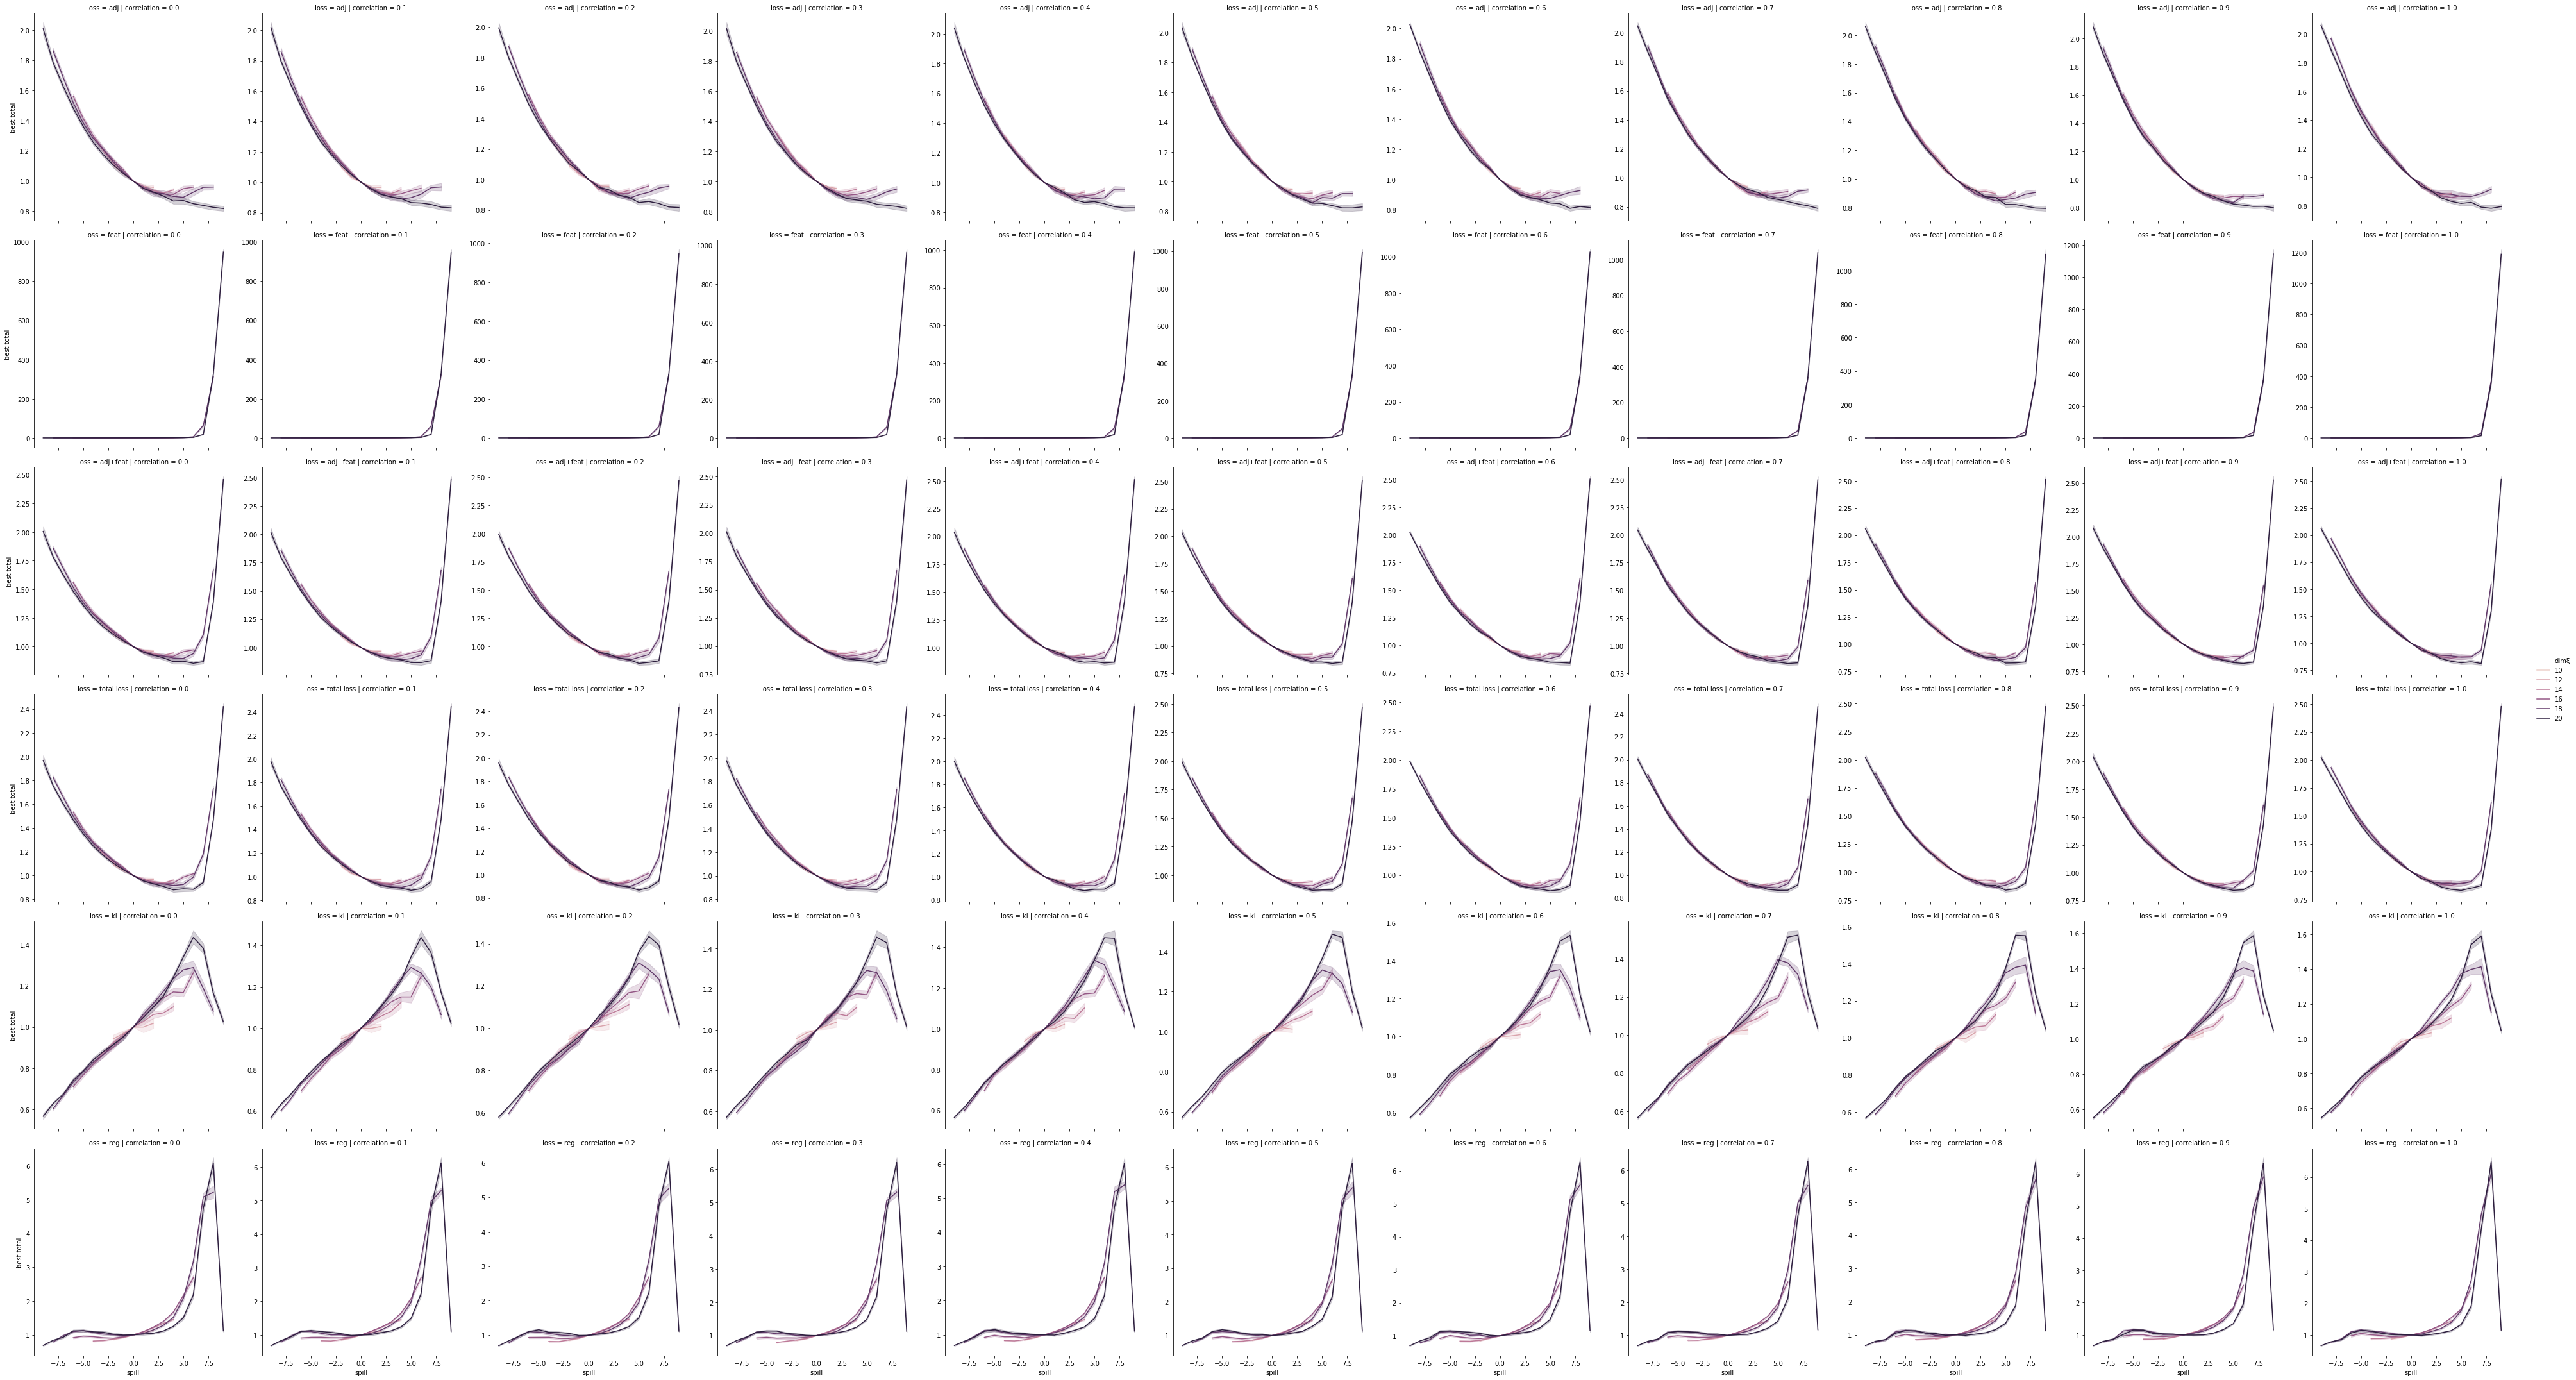

In [6]:
facet_grid = sb.relplot(x='spill', y='best total',
                        hue='dimξ', col='correlation',
                        row='loss', row_order=['adj', 'feat', 'adj+feat', 'total loss', 'kl', 'reg'],
                        data=best_total_relspill,
                        kind='line', legend='full', facet_kws={'sharey': False})

#facet_grid.set(yscale='log')

#for ax in facet_grid.axes[1]:
#    ax.set_ylim(0, 150)
#for ax in facet_grid.axes[2:4].flat:
#    ax.set_ylim(700, 900)
#
#figure_file = FIGURE_PATH.format(n_nodes=N_NODES, n_clusters=N_CLUSTERS,
#                                 n_alphas=N_ALPHAS, n_models=N_MODEL_SAMPLES, n_clusterings=N_CLUSTERINGS,
#                                 data_name='absolute_vs_spillv2adj-hue=ref_ov')
#facet_grid.fig.savefig(figure_file, bbox_inches='tight')

### columns = overlap, hue = correlation

Absolute

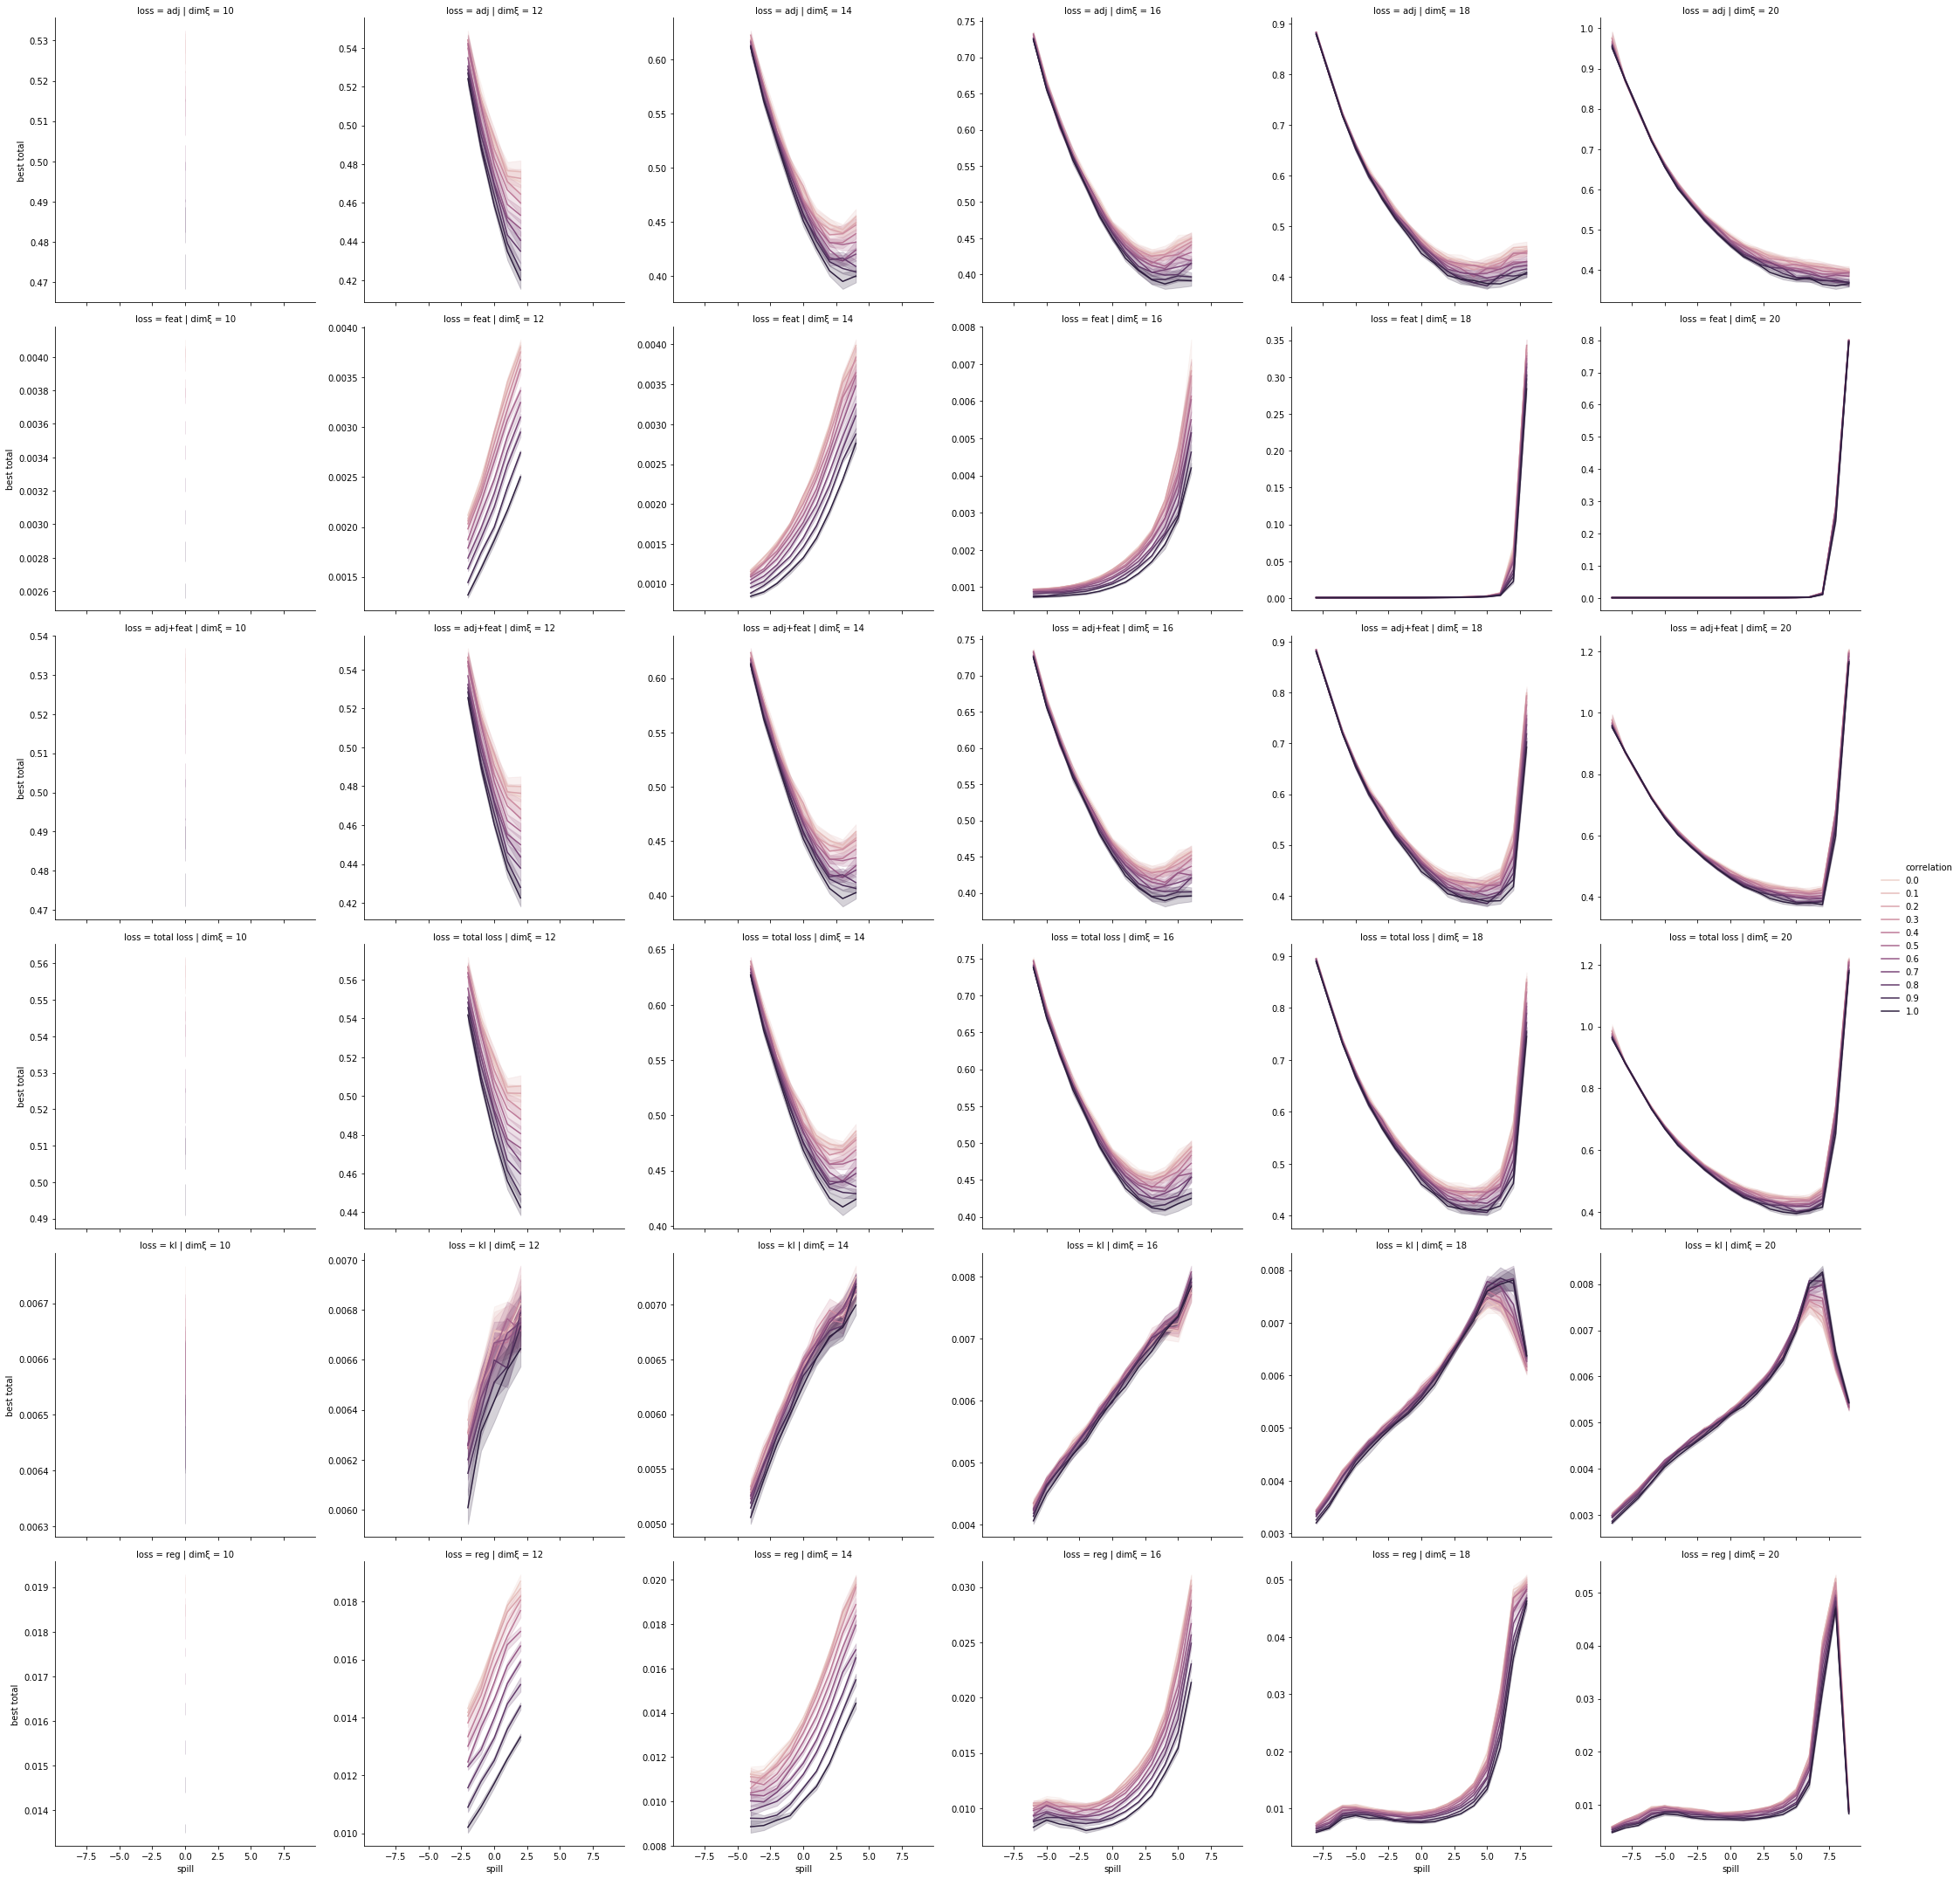

In [7]:
facet_grid = sb.relplot(x='spill', y='best total',
                        hue='correlation', col='dimξ',
                        row='loss', row_order=['adj', 'feat', 'adj+feat', 'total loss', 'kl', 'reg'],
                        data=best_total,
                        kind='line', legend='full', facet_kws={'sharey': False})

#facet_grid.set(yscale='log')

#for ax in facet_grid.axes[1]:
#    ax.set_ylim(0, 150)
#for ax in facet_grid.axes[2:4].flat:
#    ax.set_ylim(700, 900)
#
#figure_file = FIGURE_PATH.format(n_nodes=N_NODES, n_clusters=N_CLUSTERS,
#                                 n_alphas=N_ALPHAS, n_models=N_MODEL_SAMPLES, n_clusterings=N_CLUSTERINGS,
#                                 data_name='absolute_vs_spillv2adj-hue=ref_ov')
#facet_grid.fig.savefig(figure_file, bbox_inches='tight')

Relative

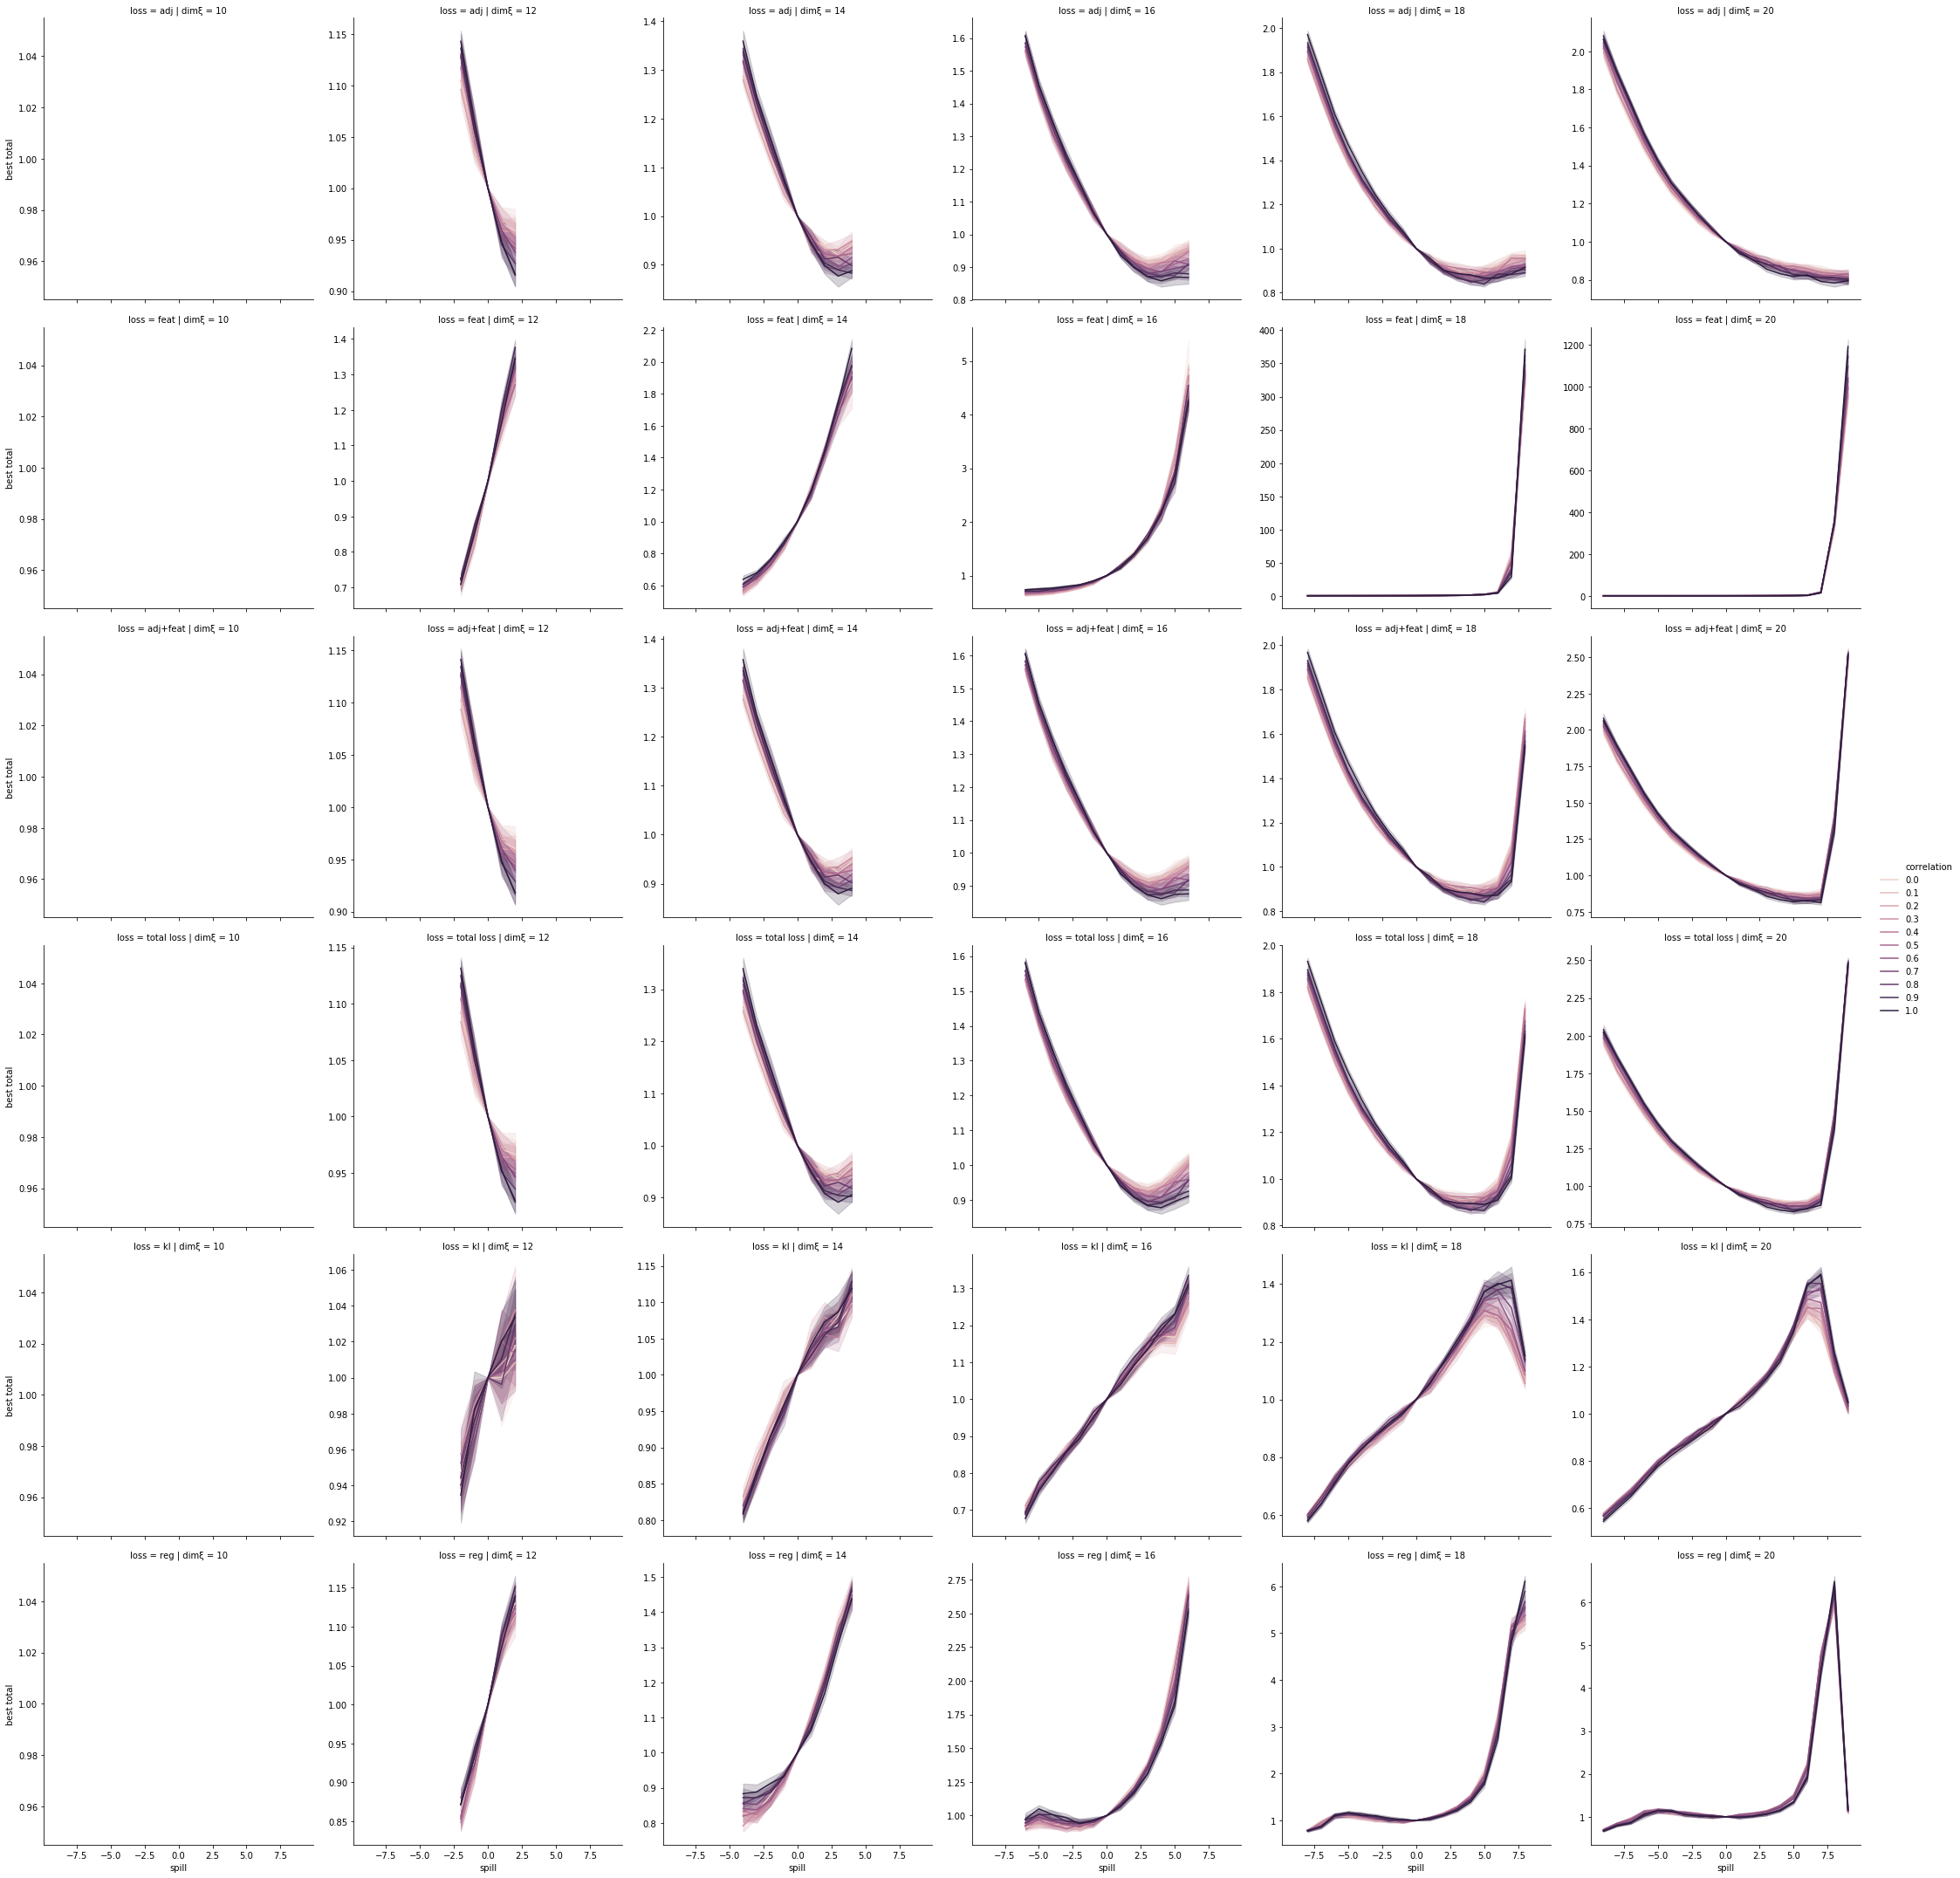

In [8]:
facet_grid = sb.relplot(x='spill', y='best total',
                        hue='correlation', col='dimξ',
                        row='loss', row_order=['adj', 'feat', 'adj+feat', 'total loss', 'kl', 'reg'],
                        data=best_total_relspill,
                        kind='line', legend='full', facet_kws={'sharey': False})

#facet_grid.set(yscale='log')

#for ax in facet_grid.axes[1]:
#    ax.set_ylim(0, 150)
#for ax in facet_grid.axes[2:4].flat:
#    ax.set_ylim(700, 900)
#
#figure_file = FIGURE_PATH.format(n_nodes=N_NODES, n_clusters=N_CLUSTERS,
#                                 n_alphas=N_ALPHAS, n_models=N_MODEL_SAMPLES, n_clusterings=N_CLUSTERINGS,
#                                 data_name='absolute_vs_spillv2adj-hue=ref_ov')
#facet_grid.fig.savefig(figure_file, bbox_inches='tight')